In [4]:
import pandas as pd
import numpy as np

columns = ["Aggregate (millions of euro)", "Breakdown by industry (NACE Rev2)", "TIME", "Value"]

df = pd.read_csv("annual_wage_by_industry.csv", on_bad_lines='skip')
df = df[columns]
df.tail(5)

,Aggregate (millions of euro),Breakdown by industry (NACE Rev2),TIME,Value
82815,domestic wages and salaries,"activities of households as employers, undiffe...",2018,16607.4
82816,domestic wages and salaries,"activities of households as employers, undiffe...",2019,16553.6
82817,domestic wages and salaries,"activities of households as employers, undiffe...",2020,16100.2
82818,domestic wages and salaries,"activities of households as employers, undiffe...",2021,16386.3
82819,domestic wages and salaries,"activities of households as employers, undiffe...",2022,15801.0


In [5]:
selected_categories = ["wholesale and retail trade services, repair of vehicles and motorcycles",
                       "transportation and storage", "accommodation and food service activities",
                       "information and communication", "financial and insurance activities",
                       "professional, scientific and technical activities, administrative and support service activities",
                       "public administration and defence, compulsory social security", "education",
                       "human health and social work activities",
                       "arts, entertainment and recreation, repair of household goods and other services"
                       ]

In [6]:
df_salaries = df[df["Aggregate (millions of euro)"] == "domestic wages and salaries"].drop('Aggregate (millions of euro)', axis=1)
selected_df_salaries = df_salaries[df_salaries['Breakdown by industry (NACE Rev2)'].isin(selected_categories)]
selected_df_salaries

,Breakdown by industry (NACE Rev2),TIME,Value
3306,transportation and storage,2000,20930.2
3307,transportation and storage,2001,21567.2
3308,transportation and storage,2002,21969.5
3309,transportation and storage,2003,22836.6
3310,transportation and storage,2004,23285.1
...,...,...,...
82770,"arts, entertainment and recreation, repair of ...",2018,30454.7
82771,"arts, entertainment and recreation, repair of ...",2019,30655.6
82772,"arts, entertainment and recreation, repair of ...",2020,27943.4
82773,"arts, entertainment and recreation, repair of ...",2021,29474.1


In [7]:
grp_salaries = selected_df_salaries.groupby('Breakdown by industry (NACE Rev2)')
grp_salaries = grp_salaries.head(2431)
grp_salaries.groupby("TIME").head(2431)

,Breakdown by industry (NACE Rev2),TIME,Value
3306,transportation and storage,2000,20930.2
3307,transportation and storage,2001,21567.2
3308,transportation and storage,2002,21969.5
3309,transportation and storage,2003,22836.6
3310,transportation and storage,2004,23285.1
...,...,...,...
82770,"arts, entertainment and recreation, repair of ...",2018,30454.7
82771,"arts, entertainment and recreation, repair of ...",2019,30655.6
82772,"arts, entertainment and recreation, repair of ...",2020,27943.4
82773,"arts, entertainment and recreation, repair of ...",2021,29474.1


In [8]:
grp_salaries.groupby("TIME")

In [10]:
salaries = grp_salaries.pivot_table(index='Breakdown by industry (NACE Rev2)', columns='TIME', values='Value')
salaries.head(5)

TIME,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Breakdown by industry (NACE Rev2),,,,,,,,,,,,,,,,,,,,,
accommodation and food service activities,11416.4,12469.8,13079.7,13798.8,14506.7,15146.1,16148.3,17021.0,17767.2,18028.2,...,19204.9,19627.9,20878.1,22332.309091,23809.618182,24783.372727,25504.56,16732.6000,20031.383333,27762.466667
"arts, entertainment and recreation, repair of household goods and other services",17080.6,18231.0,19111.7,19701.1,20924.0,22070.7,23343.5,24726.9,26167.1,27275.8,...,29261.7,29883.7,30216.8,30251.100000,30214.636364,30462.754545,30603.76,27308.3250,28865.216667,30286.400000
education,30856.6,32926.2,34364.3,35754.9,35018.5,37396.3,38964.2,40276.1,39424.0,40458.0,...,37377.1,37394.4,37309.2,37707.436364,38293.945455,39886.918182,39934.10,39466.2375,41445.516667,44540.033333
financial and insurance activities,19721.9,20212.0,20643.2,21189.4,21927.6,22945.6,25140.7,26710.1,26285.2,25265.1,...,23651.8,23885.2,24372.6,24898.090909,24315.718182,24369.536364,25005.90,24646.8250,25333.233333,26216.066667
human health and social work activities,27518.1,29206.9,30439.9,31397.0,34235.9,35994.4,38659.1,37811.8,41375.3,40944.9,...,42360.6,42735.6,43157.3,43773.490909,44224.272727,45389.772727,46399.50,46032.8250,48128.916667,50591.733333


In [11]:
average_annual_wage = {
    2000: 21255, 2001: 21952, 2002: 22437, 2003: 23059, 2004: 24078,
    2005: 24886, 2006: 25713, 2007: 26280, 2008: 27089, 2009: 27140,
    2010: 27807, 2011: 28157, 2012: 27984, 2013: 28385, 2014: 28563,
    2015: 28859, 2016: 29121, 2017: 28242, 2018: 29560, 2019: 29882,
    2020: 28419, 2021: 30048, 2022: 31530
}

# Converting dictionary to DataFrame
df_average_annual_wage = pd.DataFrame.from_dict(average_annual_wage, orient='index', columns=['Average Annual Wage'])
df_average_annual_wage.index.name = 'Year'

df_average_annual_wage = df_average_annual_wage.transpose()
df_average_annual_wage

Year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Average Annual Wage,21255,21952,22437,23059,24078,24886,25713,26280,27089,27140,...,28385,28563,28859,29121,28242,29560,29882,28419,30048,31530


In [12]:
salaries.columns = salaries.columns.astype(int)
salaries

TIME,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Breakdown by industry (NACE Rev2),,,,,,,,,,,,,,,,,,,,,
accommodation and food service activities,11416.4,12469.8,13079.7,13798.8,14506.7,15146.1,16148.3,17021.0,17767.2,18028.2,...,19204.9,19627.9,20878.1,22332.309091,23809.618182,24783.372727,25504.56,16732.6000,20031.383333,27762.466667
"arts, entertainment and recreation, repair of household goods and other services",17080.6,18231.0,19111.7,19701.1,20924.0,22070.7,23343.5,24726.9,26167.1,27275.8,...,29261.7,29883.7,30216.8,30251.100000,30214.636364,30462.754545,30603.76,27308.3250,28865.216667,30286.400000
education,30856.6,32926.2,34364.3,35754.9,35018.5,37396.3,38964.2,40276.1,39424.0,40458.0,...,37377.1,37394.4,37309.2,37707.436364,38293.945455,39886.918182,39934.10,39466.2375,41445.516667,44540.033333
financial and insurance activities,19721.9,20212.0,20643.2,21189.4,21927.6,22945.6,25140.7,26710.1,26285.2,25265.1,...,23651.8,23885.2,24372.6,24898.090909,24315.718182,24369.536364,25005.90,24646.8250,25333.233333,26216.066667
human health and social work activities,27518.1,29206.9,30439.9,31397.0,34235.9,35994.4,38659.1,37811.8,41375.3,40944.9,...,42360.6,42735.6,43157.3,43773.490909,44224.272727,45389.772727,46399.50,46032.8250,48128.916667,50591.733333
information and communication,11315.6,12426.9,13390.5,13594.7,13774.0,14413.7,14929.3,15531.2,16055.0,16720.5,...,16974.3,16905.4,17766.5,18602.045455,18967.154545,19564.009091,20096.85,19837.0625,21625.916667,22745.566667
"professional, scientific and technical activities, administrative and support service activities",18829.9,20702.7,22624.4,23879.6,25173.2,27170.4,28903.7,31080.3,33001.0,33760.1,...,37288.8,38382.7,40374.4,42070.700000,44796.554545,47327.318182,48448.01,45251.2500,50737.350000,55993.933333
"public administration and defence, compulsory social security",34704.0,36820.5,38696.9,41787.9,44275.3,45454.0,47161.6,46913.0,49029.9,49455.0,...,47288.6,46324.1,45858.0,46614.927273,46610.763636,48102.845455,47450.26,47140.3750,46947.400000,49918.866667
transportation and storage,20930.2,21567.2,21969.5,22836.6,23285.1,24123.4,25159.5,26389.8,27114.3,26628.5,...,26875.0,27055.0,27907.3,28939.900000,29799.981818,30647.127273,31520.10,28794.5000,31146.133333,32651.866667


In [13]:
merged_df = pd.concat([salaries, df_average_annual_wage], axis=0)
merged_df

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
accommodation and food service activities,11416.4,12469.8,13079.7,13798.8,14506.7,15146.1,16148.3,17021.0,17767.2,18028.2,...,19204.9,19627.9,20878.1,22332.309091,23809.618182,24783.372727,25504.56,16732.6000,20031.383333,27762.466667
"arts, entertainment and recreation, repair of household goods and other services",17080.6,18231.0,19111.7,19701.1,20924.0,22070.7,23343.5,24726.9,26167.1,27275.8,...,29261.7,29883.7,30216.8,30251.100000,30214.636364,30462.754545,30603.76,27308.3250,28865.216667,30286.400000
education,30856.6,32926.2,34364.3,35754.9,35018.5,37396.3,38964.2,40276.1,39424.0,40458.0,...,37377.1,37394.4,37309.2,37707.436364,38293.945455,39886.918182,39934.10,39466.2375,41445.516667,44540.033333
financial and insurance activities,19721.9,20212.0,20643.2,21189.4,21927.6,22945.6,25140.7,26710.1,26285.2,25265.1,...,23651.8,23885.2,24372.6,24898.090909,24315.718182,24369.536364,25005.90,24646.8250,25333.233333,26216.066667
human health and social work activities,27518.1,29206.9,30439.9,31397.0,34235.9,35994.4,38659.1,37811.8,41375.3,40944.9,...,42360.6,42735.6,43157.3,43773.490909,44224.272727,45389.772727,46399.50,46032.8250,48128.916667,50591.733333
information and communication,11315.6,12426.9,13390.5,13594.7,13774.0,14413.7,14929.3,15531.2,16055.0,16720.5,...,16974.3,16905.4,17766.5,18602.045455,18967.154545,19564.009091,20096.85,19837.0625,21625.916667,22745.566667
"professional, scientific and technical activities, administrative and support service activities",18829.9,20702.7,22624.4,23879.6,25173.2,27170.4,28903.7,31080.3,33001.0,33760.1,...,37288.8,38382.7,40374.4,42070.700000,44796.554545,47327.318182,48448.01,45251.2500,50737.350000,55993.933333
"public administration and defence, compulsory social security",34704.0,36820.5,38696.9,41787.9,44275.3,45454.0,47161.6,46913.0,49029.9,49455.0,...,47288.6,46324.1,45858.0,46614.927273,46610.763636,48102.845455,47450.26,47140.3750,46947.400000,49918.866667
transportation and storage,20930.2,21567.2,21969.5,22836.6,23285.1,24123.4,25159.5,26389.8,27114.3,26628.5,...,26875.0,27055.0,27907.3,28939.900000,29799.981818,30647.127273,31520.10,28794.5000,31146.133333,32651.866667
Average Annual Wage,21255.0,21952.0,22437.0,23059.0,24078.0,24886.0,25713.0,26280.0,27089.0,27140.0,...,28385.0,28563.0,28859.0,29121.000000,28242.000000,29560.000000,29882.00,28419.0000,30048.000000,31530.000000


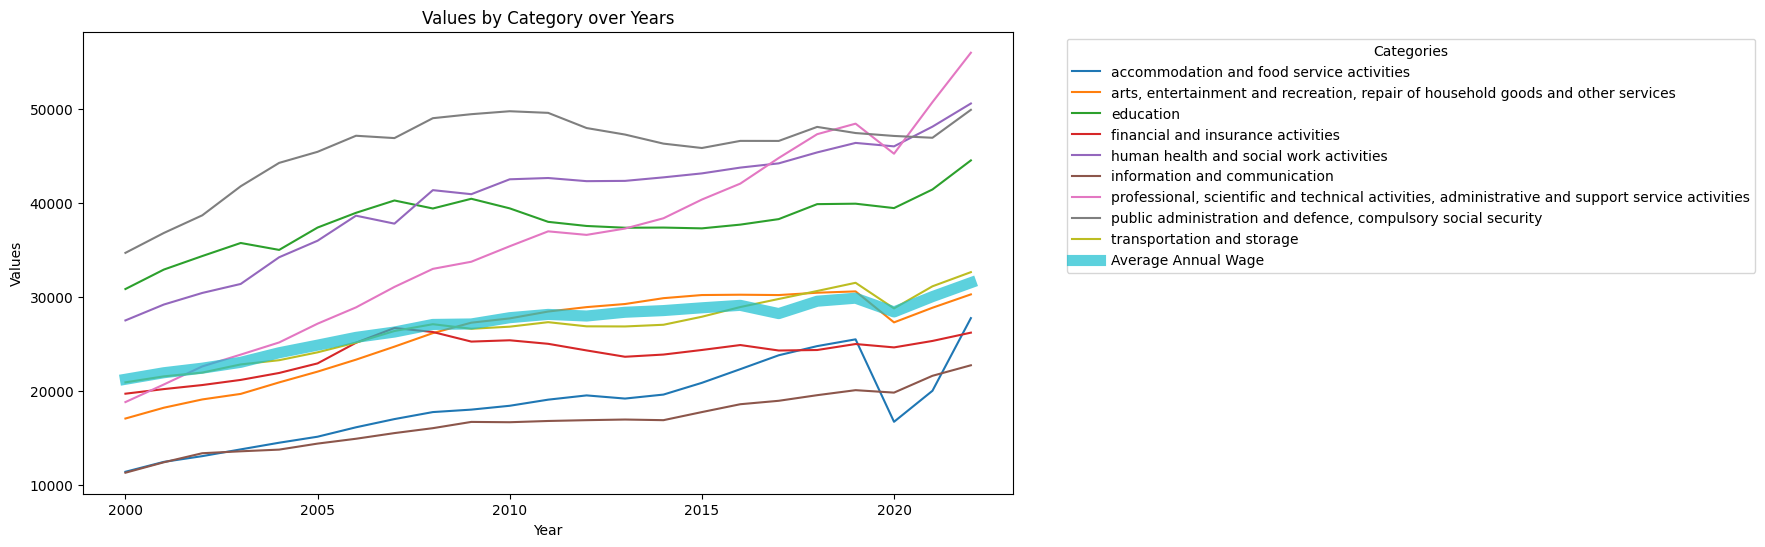

In [21]:
import matplotlib.pyplot as plt

# Assuming merged_df contains your DataFrame

# Transpose the dataframe for plotting
df_transposed = merged_df.transpose()

# Plotting
ax = df_transposed.plot(kind='line', figsize=(12, 6))

# Making "Average Annual Wage" line bold
ax.lines[-1].set_linewidth(8)  # Adjust the width as needed
ax.lines[-1].set_alpha(0.7)

plt.xlabel('Year')
plt.ylabel('Values')
plt.title('Values by Category over Years')
plt.legend(title='Categories', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
